# Example notebook for basic analysis of low loss SI data
### Using low level functions from pyTEMlib eels tools
Written by Austin Houston on 12/04/2023

## Import Libraries

In [1]:
import sys

# the line below is can be removed after update of pyTEMlib
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')

import numpy as np
import matplotlib.pylab as plt
%matplotlib widget

import pyTEMlib
import pyTEMlib.file_tools as ft
from pyTEMlib import eels_tools
print(pyTEMlib.__version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
0.2023.12.1


## Load example data

Use map_double_grain_boundary.dm4

In [2]:
fileWidget = ft.FileWidget('../../example_data/')

In [3]:
datasets = fileWidget.datasets

image = datasets['Channel_000']
survey = datasets['Channel_001']
spectrum_image = datasets['Channel_002']

eels_dataset = spectrum_image

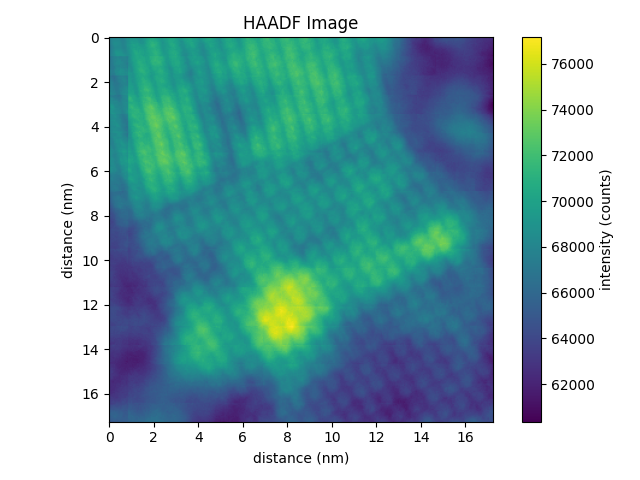

In [4]:
view = survey.plot()

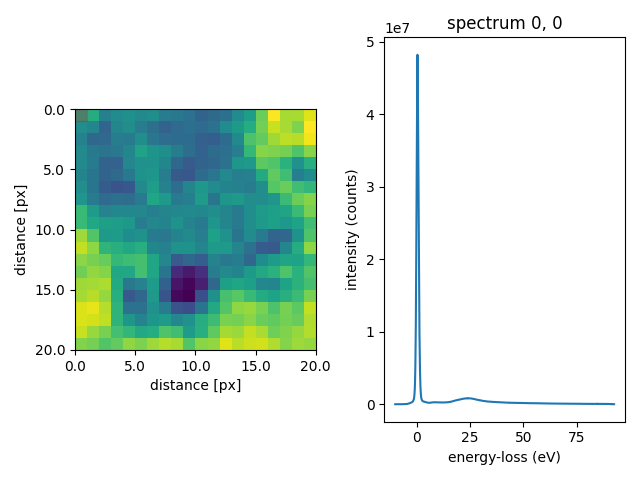

In [5]:
view = eels_dataset.plot()

## Shift all ZLP to 0

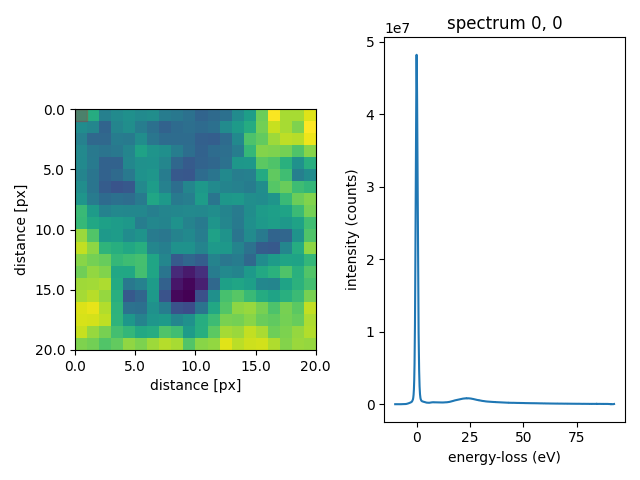

In [6]:
aligned_dset, shifts = eels_tools.align_zlps(eels_dataset, return_shifts=True)

view = aligned_dset.plot()

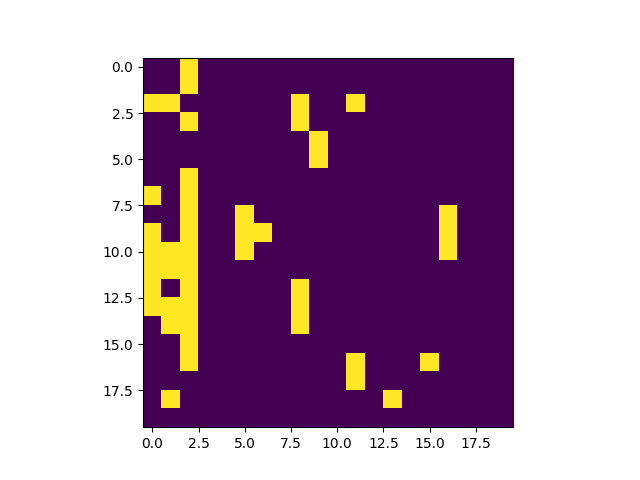

In [7]:
plt.figure()
plt.imshow(shifts)

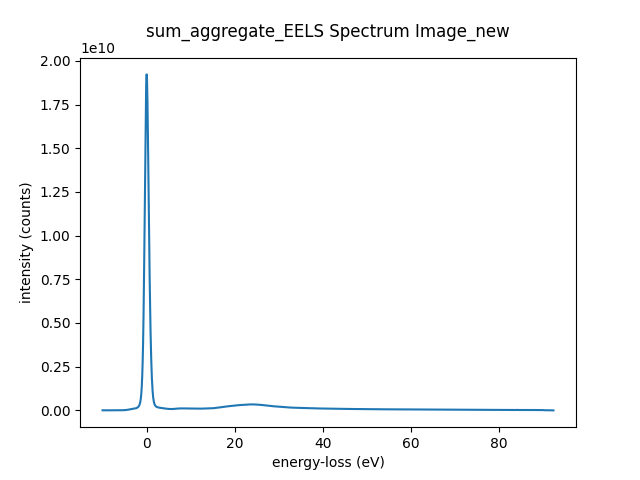

In [8]:
sum_spec = aligned_dset.sum(axis=(0,1))
sum_spec.data_type = 'spectrum'

view = sum_spec.plot()

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
You don't ha

/Users/austin/miniconda3/envs/pyTEMlib/lib/python3.11/site-packages/dask/array/core.py:1712: FutureWarning: The `numpy.split` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


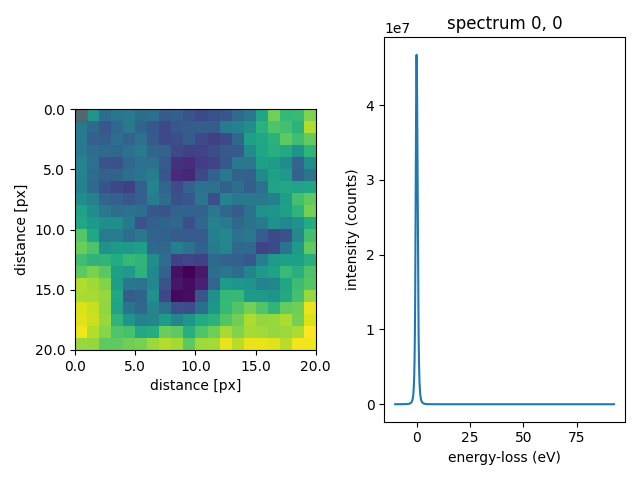

In [9]:
resolution_func_dset, z_loss_params = eels_tools.get_resolution_functions(aligned_dset, startFitEnergy = -3.0, endFitEnergy = 3.0, n_workers = 4, n_threads = 8)

view = resolution_func_dset.plot()

## Fit and map plasmon shifts

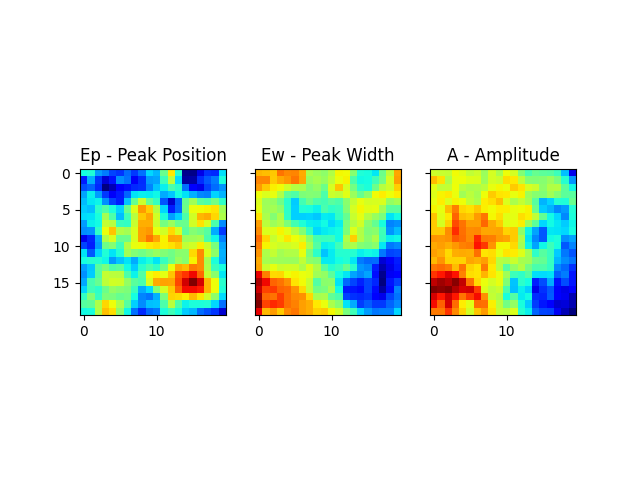

In [12]:
fitted_plasmon_dataset = eels_tools.fit_plasmon(aligned_dset, startFitEnergy = 15, endFitEnergy = 35, plot_result = True)